In [37]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
fine_df_file = '../data/interim/fine_enriched_parking_violations.tsv'

In [3]:
df = pd.read_csv(fine_df_file, sep='\t', parse_dates=['ticket_issue_datetime'])
df['counter'] = 1
df['dmv_area'] =  (df.rp_plate_state=='DC') | (df.rp_plate_state=='MD') | (df.rp_plate_state=='VA')

In [4]:
df.columns

Index(['x', 'y', 'objectid', 'rowid_', 'holiday', 'violation_code',
       'violation_description', 'location', 'rp_plate_state', 'body_style',
       'address_id', 'streetsegid', 'xcoord', 'ycoord', 'filename',
       'ticket_issue_datetime', 'fine', 'counter', 'dmv_area'],
      dtype='object')

# Select Only Violations that are DC, Maryland or Virginia

In [5]:
selected_states = set(['DC', 'MD', 'VA'])

In [6]:
dmv_df = df[(df.rp_plate_state=='DC') | (df.rp_plate_state=='MD') | (df.rp_plate_state=='VA') ]

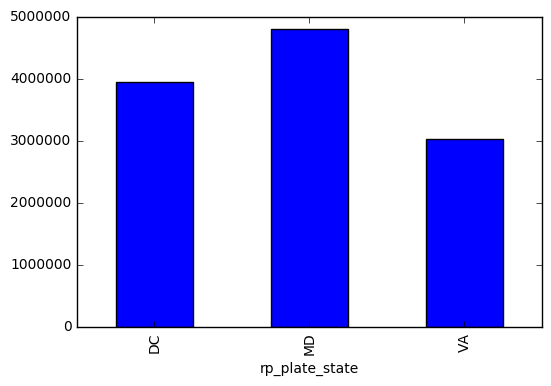

In [14]:
by_state = dmv_df.groupby('rp_plate_state').counter.sum()
by_state.plot(kind='bar')

In [42]:
by_fines = dmv_df.groupby('rp_plate_state').fine.sum()


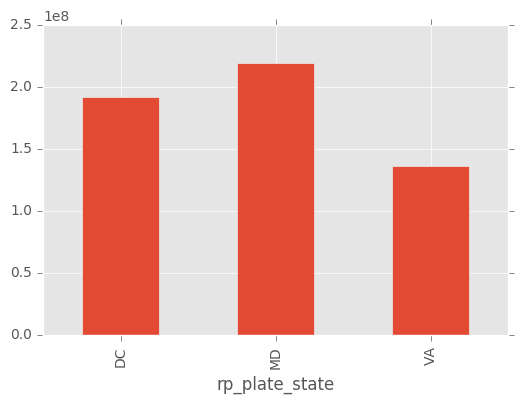

In [45]:
by_fines.plot(kind='bar')

In [19]:
dmv_df.set_index("ticket_issue_datetime", inplace=True)

In [28]:
state_by_year = dmv_df.groupby([pd.TimeGrouper('12M'), 'rp_plate_state' ]).fine.sum()

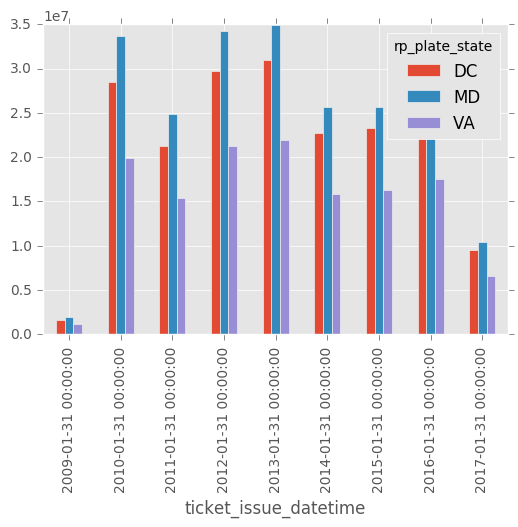

In [41]:
state_by_year.unstack().plot.bar()